In [39]:
# preprocess data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import DBSCAN
import treelib
import pyclust
from sklearn.cluster import hierarchical
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

In [4]:
# get attributes and dimension-reduced attributes
data = pd.read_csv('attributes_05.15.2017.csv')
data['Response'].unique()
data['EdDispGroup'].unique()
data['INJ_TYPE'].unique()
data.join(pd.get_dummies(data['Response']))
data.join(pd.get_dummies(data['EdDispGroup']))
data.join(pd.get_dummies(data['INJ_TYPE']))
if (len(data[data['WithAttributes?']!= 'Yes']) == 0):
    data.drop('WithAttributes?', axis =1,inplace=True)
data.drop('Response',axis =1 ,inplace = True)
data.drop('INJ_TYPE',axis =1 ,inplace = True)
data.drop('EdDispGroup',axis =1 ,inplace = True)
attributes=[]
for index in range(len(data)):
    attributes.append(data.drop('id',axis=1,inplace=False).iloc[index])
attributes = np.array(attributes)
dimension_reduced = PCA(n_components=2).fit_transform(attributes)
dimension_reduced

array([[  3.97490825e+00,  -7.65586251e-01],
       [  8.65175306e-02,  -1.33163253e+00],
       [  4.01022096e+00,  -7.80436222e-01],
       [  2.26536428e+00,  -6.56857281e-01],
       [  5.21948224e+00,  -8.47830325e-01],
       [  2.89796682e-01,   2.47281333e+00],
       [  5.60558139e-01,  -1.13175643e+00],
       [ -1.10523510e-02,  -7.13035796e-01],
       [  5.74279878e-02,  -1.25382681e+00],
       [ -8.30044680e-01,   1.58514606e+00],
       [  1.13399080e-02,  -6.80477642e-01],
       [ -1.36099928e+00,   1.08334605e+00],
       [ -1.92646703e+00,  -6.54237087e-02],
       [  2.18049782e+00,  -2.12134322e-01],
       [ -2.33766587e+00,  -9.81953665e-01],
       [  1.26271217e+00,   2.85465649e+00],
       [  3.91738517e+00,  -4.16835158e-01],
       [  3.11884721e-01,   2.75181342e+00],
       [ -3.32627194e-02,  -3.79134674e-01],
       [  4.21236860e+00,   1.20645885e+00],
       [  3.91818528e+00,  -7.03049539e-02],
       [ -6.78635139e-01,   1.11163768e+00],
       [ -

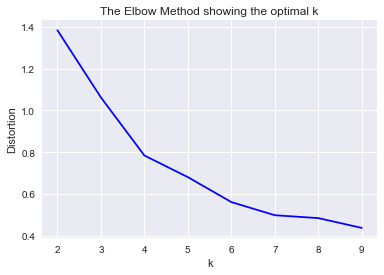

123

In [30]:
#Kmeans

distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dimension_reduced)
    distortions.append(sum(np.min(cdist(dimension_reduced, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dimension_reduced.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
dimension_reduced.shape[0]

array([[ 3.36896209, -0.24326211],
       [-1.69285828, -0.42032527],
       [-0.3360777 ,  1.80476502],
       [ 0.48111882, -0.81358651]])

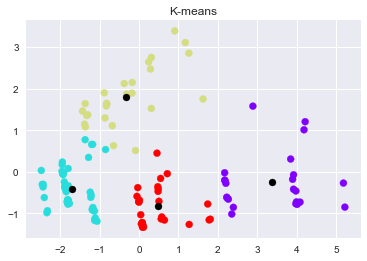

In [9]:
# best k =4
kmeans = KMeans(n_clusters=4)
kmeans.fit(dimension_reduced)
plt.scatter(dimension_reduced[:,0],dimension_reduced[:,1],c=kmeans.labels_,cmap='rainbow')
plt.title('K-means')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c = 'black')
kmeans.cluster_centers_

array([[-1.84765888, -0.47749373],
       [-0.83004468,  1.58514606],
       [ 0.50476046, -0.70705733],
       [ 3.91738517, -0.41683516]])

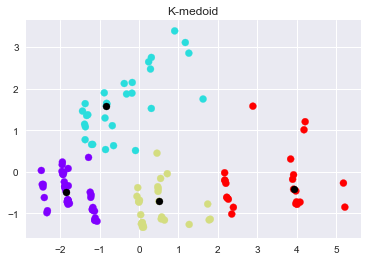

In [11]:
# K-medoid
kmd = pyclust.KMedoids(n_clusters=4, n_trials=50)
kmd.fit(dimension_reduced)
plt.scatter(dimension_reduced[:,0],dimension_reduced[:,1],c=kmd.labels_,cmap ='rainbow')
plt.title('K-medoid')
plt.scatter(kmd.centers_[:,0],kmd.centers_[:,1],c = 'black')
kmd.centers_

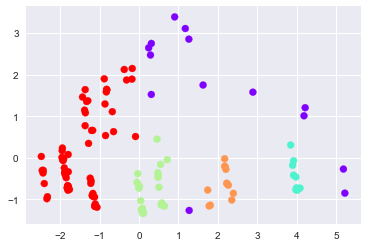

In [14]:
#Density-based spatial clustering of applications with noise 
db = DBSCAN(eps=0.6, min_samples=6).fit(dimension_reduced)
#Scikit learn uses -1 to for NOISE, and starts cluster labeling at 0. 
for i in range(0, len(db.labels_)):
    if not db.labels_[i] == -1:
        db.labels_[i] += 1
plt.scatter(dimension_reduced[:,0],dimension_reduced[:,1],c=db.labels_,cmap='rainbow')

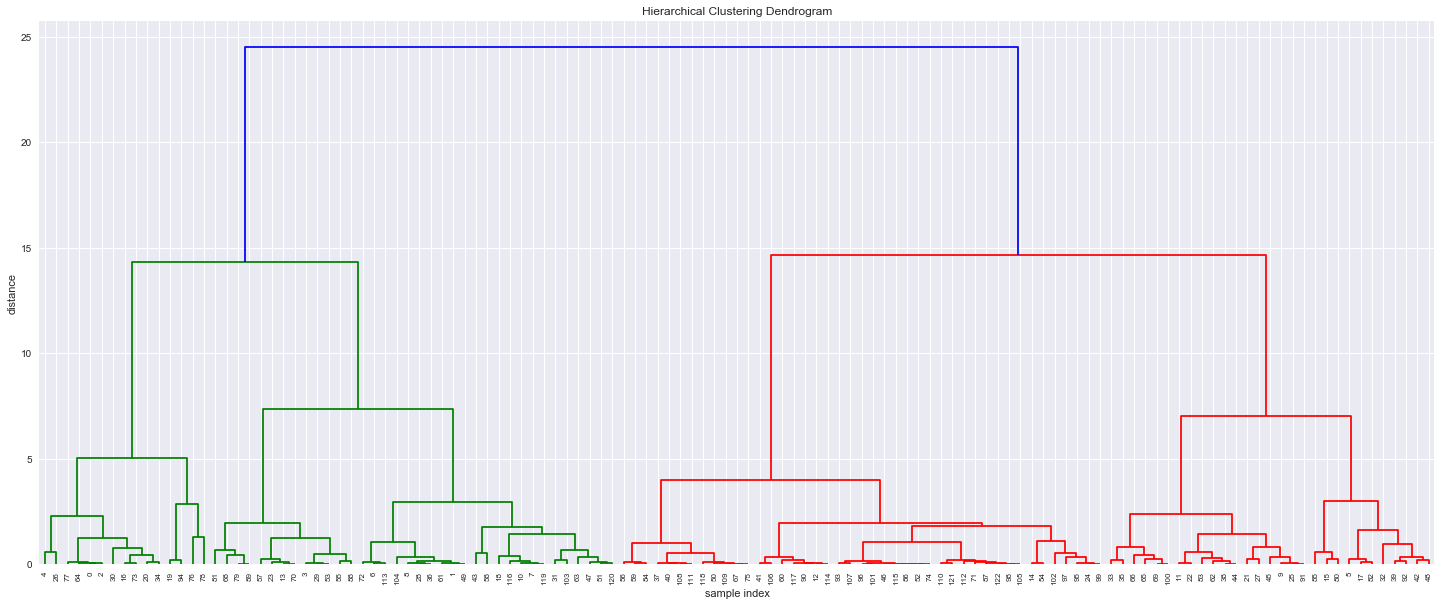

In [44]:
#Hierarchical: Agglomerative clustering
link ='ward'
ac = AgglomerativeClustering(linkage=link, n_clusters=4)
ac.fit(dimension_reduced)
# plt.scatter(dimension_reduced[:,0],dimension_reduced[:,1],c=ac.labels_,cmap='rainbow')
# create linkage matrix
Z = hierarchy.linkage(dimension_reduced, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


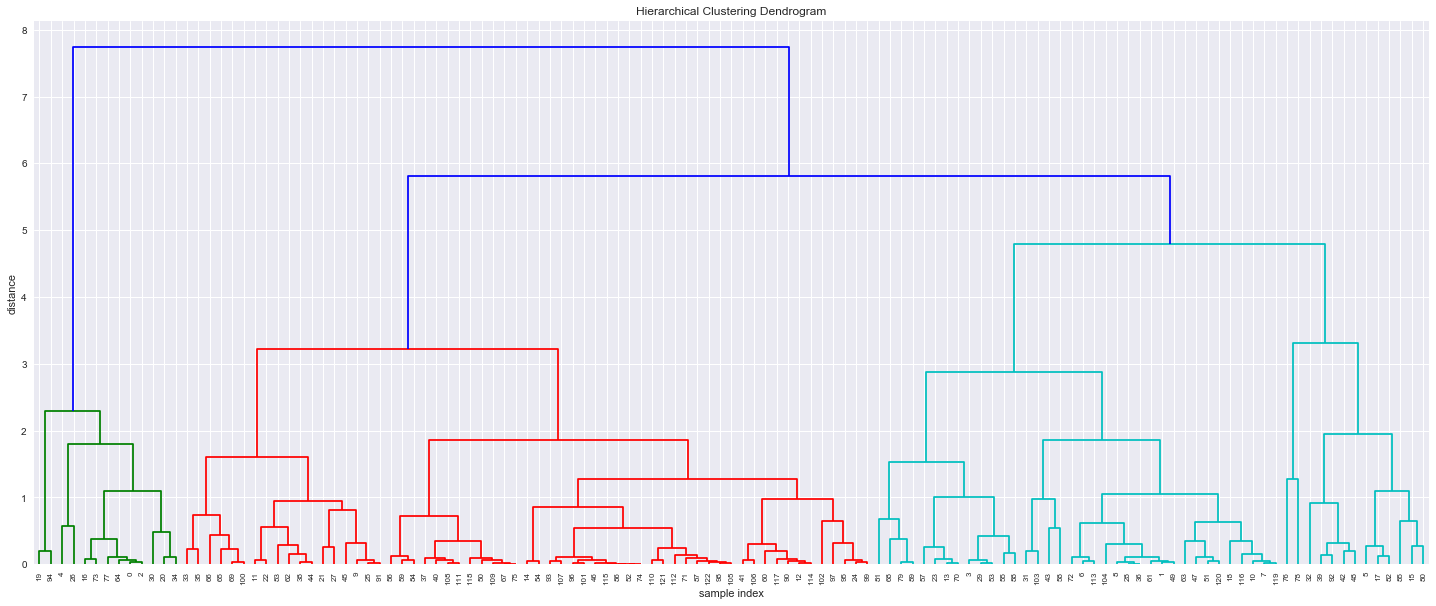

In [43]:
linkage ='complete'
ac = AgglomerativeClustering(linkage=linkage, n_clusters=4)
ac.fit(dimension_reduced)
#plt.scatter(dimension_reduced[:,0],dimension_reduced[:,1],c=ac.labels_,cmap='rainbow')
Z = hierarchy.linkage(dimension_reduced, 'complete')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

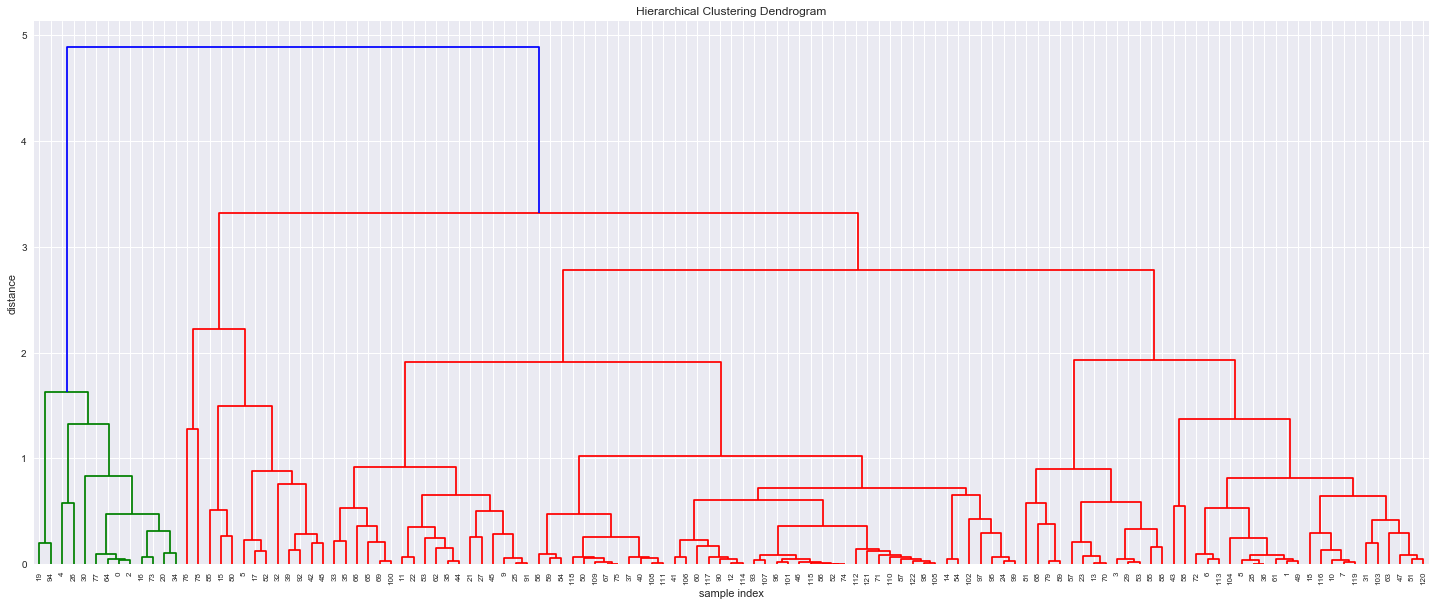

In [45]:
linkage ='average'
ac = AgglomerativeClustering(linkage=linkage, n_clusters=4)
ac.fit(dimension_reduced)
#plt.scatter(dimension_reduced[:,0],dimension_reduced[:,1],c=ac.labels_,cmap='rainbow')
Z = hierarchy.linkage(dimension_reduced, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hierarchy.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()